In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
read_df = pd.read_parquet('/content/drive/MyDrive/twitter_data.parquet')
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
0,2021-06-20T21:33:30.000Z,1406726930888540160,1406726930888540160,2981738470,RT @davidlohner: #IchbinHanna und schreibe auc...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406714909258362...",['IchbinHanna'],retweet,de
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
2,2021-06-20T20:50:42.000Z,1406716159064485895,1406716159064485895,2981738470,RT @DrKEichhorn: Wieder ein Artikel ohne echte...,16,0,0,0,"[{'type': 'retweeted', 'id': '1406697315159752...",[],retweet,de
3,2021-06-20T17:56:03.000Z,1406672208056012807,1406672208056012807,2981738470,RT @chrismeyer2203: So sieht es aus ⬇️ oder an...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406175728190865...",[],retweet,de
4,2021-06-20T17:53:00.000Z,1406671439328055301,1406671439328055301,2981738470,RT @steffen_siegel: Modelle einer Universitäts...,17,0,0,0,"[{'type': 'retweeted', 'id': '1406666454368493...",[],retweet,de


In [55]:
read_df = read_df.drop_duplicates(subset=['tweet_id'])
read_df.shape

(181552, 13)

In [56]:
read_df['tweet_language'].value_counts()

de         159811
en          18586
sv           1296
nl            345
fr            314
tl            195
cy            181
it            166
id            159
unknown       120
es             51
ja             49
fi             33
no             28
pl             28
sw             24
pt             22
af             19
et             17
ca             16
so             14
da             14
tr             11
ro             11
cs              7
ar              7
sl              6
hr              5
sk              4
vi              3
hi              2
fa              2
hu              2
th              1
sq              1
ru              1
lv              1
Name: tweet_language, dtype: int64

In [57]:
read_df = read_df.loc[read_df['tweet_type'] != 'retweet']
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,☝️⬇️ #IchbinHanna #PeerReview https://t.co/PFN...,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread ⬇️ about the cruel #precarity in German...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread ⬇️ zu #Machtmissbrauch in der...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [58]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

read_df.text = read_df.text.apply(remove_emojis)
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,#IchbinHanna #PeerReview https://t.co/PFNrovEOAS,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel #precarity in German #...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu #Machtmissbrauch in der #...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [59]:
def remove_mentions_and_tags(text): #Removing mentions and hashtags and url
    text = re.sub(r'@\S*', '', text)
    text = re.sub(r'http\S+', '', text)
    return re.sub(r'#\S*', '', text)

read_df.text = read_df.text.apply(remove_mentions_and_tags)

In [60]:
read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations

<ipython-input-60-3fb73e3f27b0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations


In [61]:
read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number

<ipython-input-61-0aff5bac0485>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number


In [ ]:
#English

In [62]:
en_df = read_df[read_df.tweet_language == 'en']
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en


In [63]:
!pip install HanTa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
#getting nouns and adjectives
import nltk
nltk.download('punkt')
from HanTa import HanoverTagger as ht

en_tagger = ht.HanoverTagger('morphmodel_en.pgz')

def en_noun(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in en_tagger.tag_sent(words,taglevel= 1) if pos == 'NN']
  return tokens

def en_adj(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in en_tagger.tag_sent(words,taglevel= 1) if pos == 'ADJ']
  return tokens

en_df['en_noun'] = en_df.text.apply(en_noun)
en_df['en_adj'] = en_df.text.apply(en_adj)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-64-5d404d764466>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['en_noun'] = en_df.text.apply(en_noun)
<ipython-input-64-5d404d764466>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['en_adj'] = en_df.text.apply(en_adj)


In [65]:
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,"[Thread, debate]",[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,"[Thread, video, Ministry, Education, Research,...",[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,"[job, impact, life]",[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,"[post, comment, job, Ministry, Education, Rese...",[]


In [66]:
en_df.en_adj.unique

<bound method Series.unique of 11        []
105       []
125       []
215       []
238       []
          ..
308092    []
308243    []
308292    []
308293    []
308323    []
Name: en_adj, Length: 6129, dtype: object>

In [67]:
def to_lowercase(text):
  token = []
  for i in range(len(text)):
    val = text[i].lower()
    token.append(val)
  return token

en_df.en_noun = en_df.en_noun.apply(to_lowercase)

en_df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,"[thread, debate]",[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,"[thread, video, ministry, education, research,...",[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,"[job, impact, life]",[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,"[post, comment, job, ministry, education, rese...",[]


In [68]:
en_df.en_adj = en_df.en_adj.apply(to_lowercase)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
english_stop_words.append('amp')

def stop_word_en_removal(x):
    return ' '.join([w for w in x if not w in english_stop_words])

en_df.en_noun = en_df.en_noun.apply(stop_word_en_removal)
en_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,[]


In [70]:
en_df.en_adj = en_df.en_adj.apply(stop_word_en_removal)
en_df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,


In [71]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [72]:
#lemmatizer
import nltk
import pandas as pd

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

en_df['text_lemmatized_adj'] = en_df.en_adj.apply(lemmatize_text)
en_df['text_lemmatized_noun'] = en_df.en_noun.apply(lemmatize_text)

<ipython-input-72-4bf02524c4d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['text_lemmatized_adj'] = en_df.en_adj.apply(lemmatize_text)
<ipython-input-72-4bf02524c4d4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['text_lemmatized_noun'] = en_df.en_noun.apply(lemmatize_text)


In [75]:
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj,text_lemmatized_adj,text_lemmatized_noun
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,,[],"[thread, debate]"
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,,[],"[thread, video, ministry, education, research,..."
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,,[],"[job, impact, life]"
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,,[],"[post, comment, job, ministry, education, rese..."


In [76]:
en_df.drop(['text_lemmatized_adj'], axis=1)
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj,text_lemmatized_adj,text_lemmatized_noun
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,,[],"[thread, debate]"
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,,[],"[thread, video, ministry, education, research,..."
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,,[],"[job, impact, life]"
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,,[],"[post, comment, job, ministry, education, rese..."


English LDA

In [77]:
def generate_tokens(tweet):
  words=[]
  for i in range(len(tweet)):
    word = tweet[i]
  # using the if condition because we introduced extra spaces during text cleaning
    if word!='':
      words.append(word)
  return words
#storing the generated tokens in a new column named 'words'
en_df['tokens'] = en_df.text_lemmatized_noun.apply(generate_tokens)

<ipython-input-77-63010c3ddfc2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['tokens'] = en_df.text_lemmatized_noun.apply(generate_tokens)


In [78]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

def create_dictionary(words):
  return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
en_id2word = create_dictionary(en_df.tokens)
print(en_id2word)

Dictionary(3602 unique tokens: ['debate', 'thread', 'discussion', 'education', 'indignation']...)


In [79]:
def create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus
#passing the dataframe column having tokens and dictionary
en_corpus = create_document_matrix(en_df.tokens, en_id2word)

In [80]:
en_lda_model = gensim.models.ldamodel.LdaModel(corpus=en_corpus, id2word=en_id2word, num_topics=10, random_state=100)

In [81]:
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)
get_lda_topics(en_lda_model,10,20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,position,right,link,thread,pm,music,situation,research,academia,academia
1,post,year,click,academia,telegram,system,academia,goal,job,work
2,university,lack,reward,seminar,movement,movement,time,airdrop,science,time
3,academia,watch,video,way,law,change,freelancer,link,project,week
4,article,link,form,lot,science,program,science,hand,postdoc,future
5,channel,term,debate,class,career,politics,career,rate,world,student
6,system,action,uk,need,contract,casualisation,brain,page,tweet,track
7,professor,life,hashtag,event,tag,academia,chef,security,market,tenure
8,check,time,thing,university,stop,lot,connection,distribution,freedom,day
9,stuff,message,structure,end,evidence,book,reason,academia,research,paper


Clustering for LDA ENglish

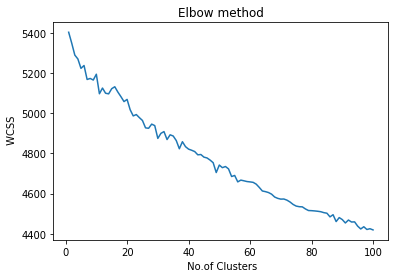

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(en_df.en_noun)
wcss = []
for i in range(1,101):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,101),wcss)
plt.title('Elbow method')
plt.xlabel(' No.of Clusters')
plt.ylabel(' WCSS')
plt.show()

In [95]:
#final cluster
clusters_en = KMeans(n_clusters = 35, init='k-means++', random_state=42)
clusters_en.fit(X)

KMeans(n_clusters=35, random_state=42)

In [96]:
print("Top terms per cluster:")
order_centroids = clusters_en.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(35):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :5]:
        print (' %s' % terms[ind],)
    print

Top terms per cluster:
Cluster 0:
 core
 experience
 research
 problem
 system
Cluster 1:
 time
 career
 science
 position
 contract
Cluster 2:
 work
 time
 academia
 research
 salary
Cluster 3:
 researcher
 career
 academia
 path
 research
Cluster 4:
 support
 academia
 day
 change
 letter
Cluster 5:
 respect
 system
 science
 framework
 solidarity
Cluster 6:
 thread
 academia
 hashtag
 hervorragender
 whod
Cluster 7:
 situation
 academia
 thread
 country
 movement
Cluster 8:
 problem
 system
 academia
 part
 thats
Cluster 9:
 academia
 time
 career
 law
 precarity
Cluster 10:
 system
 academia
 position
 precarity
 uk
Cluster 11:
 word
 tweet
 support
 solidarity
 donation
Cluster 12:
 education
 research
 ministry
 minister
 uk
Cluster 13:
 struggle
 academia
 privilege
 class
 system
Cluster 14:
 tenure
 track
 professorship
 position
 system
Cluster 15:
 instance
 grant
 field
 activism
 cause
Cluster 16:
 question
 system
 position
 politics
 article
Cluster 17:
 future
 system
 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
final = []
for i in range(35):
  inner = []
  for j in order_centroids[i, ]:
    x = '%s' % terms[j]
    if (len(x) >2):  #removing single and double letters 
      inner.append(x)
  final.append(inner)

LDA on each clusters English

In [98]:
for i in range(2):
  print(final[i])

['core', 'experience', 'research', 'problem', 'system', 'aspect', 'part', 'value', 'impact', 'course', 'reform', 'platform', 'favor', 'pig', 'issue', 'equipment', 'check', 'situation', 'pessimism', 'reputation', 'kind', 'doubt', 'creation', 'westernism', 'manifestation', 'curiosity', 'politics', 'fracture', 'time', 'handicap', 'establishment', 'mentoring', 'supervision', 'perspective', 'ageism', 'agreement', 'coalition', 'display', 'longterm', 'intersectionality', 'academia', 'dont', 'exploitation', 'collaboration', 'government', 'hope', 'event', 'academy', 'step', 'action', 'question', 'structure', 'innovation', 'country', 'position', 'university', 'number', 'job', 'power', 'way', 'hashtag', 'employment', 'work', 'father', 'fatherhood', 'fight', 'figure', 'file', 'feminist', 'fatigue', 'fighter', 'fate', 'fellow', 'film', 'field', 'fault', 'feelgood', 'fig', 'feel', 'fiction', 'feedback', 'fashion', 'feed', 'fee', 'feature', 'feat', 'fear', 'fellowship', 'fax', 'favour', 'feudalism', 

In [99]:
lmn = []
for i in range(35):
    en_cluster_dict = {"cluster": []}
    en_cluster_dict['cluster'] = final[i]
    lmn.append(en_cluster_dict)

In [100]:
for i in range(2):
  print(lmn[i])

{'cluster': ['core', 'experience', 'research', 'problem', 'system', 'aspect', 'part', 'value', 'impact', 'course', 'reform', 'platform', 'favor', 'pig', 'issue', 'equipment', 'check', 'situation', 'pessimism', 'reputation', 'kind', 'doubt', 'creation', 'westernism', 'manifestation', 'curiosity', 'politics', 'fracture', 'time', 'handicap', 'establishment', 'mentoring', 'supervision', 'perspective', 'ageism', 'agreement', 'coalition', 'display', 'longterm', 'intersectionality', 'academia', 'dont', 'exploitation', 'collaboration', 'government', 'hope', 'event', 'academy', 'step', 'action', 'question', 'structure', 'innovation', 'country', 'position', 'university', 'number', 'job', 'power', 'way', 'hashtag', 'employment', 'work', 'father', 'fatherhood', 'fight', 'figure', 'file', 'feminist', 'fatigue', 'fighter', 'fate', 'fellow', 'film', 'field', 'fault', 'feelgood', 'fig', 'feel', 'fiction', 'feedback', 'fashion', 'feed', 'fee', 'feature', 'feat', 'fear', 'fellowship', 'fax', 'favour', '

In [101]:
en_cluster_df = pd.json_normalize(lmn)
en_cluster_df.head()

,cluster
0,"[core, experience, research, problem, system, ..."
1,"[time, career, science, position, contract, ye..."
2,"[work, time, academia, research, salary, contr..."
3,"[researcher, career, academia, path, research,..."
4,"[support, academia, day, change, letter, inter..."


In [102]:
def cluster_create_dictionary(words):
  return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
cluster_en_id2word = create_dictionary(en_cluster_df.cluster)
print(cluster_en_id2word)

Dictionary(3612 unique tokens: ['_while', '_wish_', 'abandon', 'ability', 'ableism']...)


In [103]:
def cluster_create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus
#passing the dataframe column having tokens and dictionary
cluster_en_corpus = cluster_create_document_matrix(en_cluster_df.cluster, cluster_en_id2word)

In [104]:
cluster_en_lda_model = gensim.models.ldamodel.LdaModel(corpus=cluster_en_corpus, id2word=cluster_en_id2word, num_topics=10, random_state=100)

In [105]:
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)
get_lda_topics(cluster_en_lda_model,10,20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,appropriation,theyd,criterion,depression,celebration,television,claim,explosion,twitterstorm,academy
1,approval,misunderstanding,tokenism,illustration,documentation,datafication,pasting,graduating,economy,likability
2,bathroom,countersystem,burntout,backup,personality,sadness,overhaul,boldness,itprofessur,probability
3,imbalance,robot,cause,breathing,racism,organiser,loan,exposure,owner,fuckademia
4,institutionscholar,genre,attendant,whataboutism,selftorture,institution,stable,pain,tape,characteristic
5,pollutant,citation,mess,poster,legislation,neuroscience,click,pity,tweet,power
6,dialect,preprint,saying,fury,uncertaintity,bed,whiteness,backtoback,interviewhire,drag
7,judgement,tbr,madness,give,paperback,culling,title,roadside,durchlauferhitzer,ausgründungsprofessur
8,oppinion,monastery,wakeup,vaccination,commitment,iceberg,hack,wave,meteorologist,privatdozent
9,money,soll,ecologist,dialogue,graphics,mentor,desk,magic,behalf,metaphor


Cluster's LDA English

In [106]:
for i in range(27):
  clust_id2_word = create_dictionary([final[i]])
  clust_corpus = cluster_create_document_matrix([final[i]], clust_id2_word)
  clust_lda_model = gensim.models.ldamodel.LdaModel(corpus=clust_corpus, id2word=clust_id2_word, num_topics=10, random_state=100)
  print("Cluster", i+1," :")
  print(get_lda_topics(clust_lda_model,10,10))
  print("************************************ \n")

Cluster 1  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2   

Cluster 4  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2   

Cluster 7  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2   

Cluster 10  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2  

Cluster 13  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2  

Cluster 16  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2  

Cluster 19  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2  

Cluster 22  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2  

Cluster 25  :
           Topic # 01        Topic # 02 Topic # 03    Topic # 04  \
0       appropriation             theyd  criterion    depression   
1  institutionscholar     countersystem   tokenism  illustration   
2            bathroom  misunderstanding  attendant        backup   
3            approval             genre   burntout     breathing   
4           imbalance             robot       mess  whataboutism   
5           pollutant          citation      cause        poster   
6             dialect               tbr     saying          fury   
7           judgement         monastery    madness   vaccination   
8            oppinion              soll   disgrace          give   
9               money               tip     wakeup      dialogue   

      Topic # 05    Topic # 06   Topic # 07  Topic # 08         Topic # 09  \
0  documentation    television        claim  graduating       twitterstorm   
1    celebration  datafication      pasting   explosion            economy   
2  